MNIST 기본 과제

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

60000
torch.Size([1, 28, 28]) 5


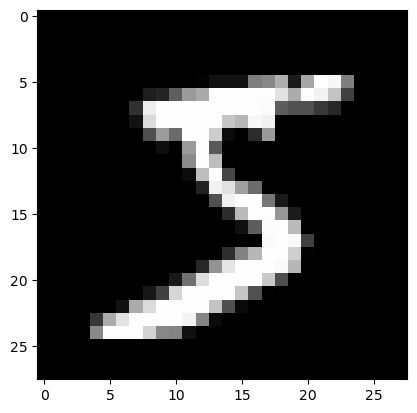

In [2]:
from matplotlib import pyplot as plt


print(len(trainset)) #이미지 데이터 총 6만개
print(trainset[0][0].shape, trainset[0][1])
#데이터 6만개중 첫번째 배열의 크기
#데이터 6만개중 첫번째는 어떤 수로 label 되어있는지
plt.imshow(trainset[0][0][0], cmap='gray')
#세번째 [0]이 사진과 match 되어있는지? 

In [3]:
dataiter = iter(trainloader)
images, labels = next(dataiter) #dataiter에서 하나 뽑아옴
print(images.shape, labels.shape) 
#image 배열의 데이터 설명임
#28x28 이미지 데이터를 64개의 batch size로 설정함
#labels의 경우 이미지 데이터의 label이므로 1x64의 크기

torch.Size([256, 1, 28, 28]) torch.Size([256])


In [4]:
from torch import nn

class SoftMaxClassifierModel(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10) #0~9의 확률이 나오기때문

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

model = SoftMaxClassifierModel(28 * 28 * 1, 10)

In [5]:
from torch.optim import SGD
import torch.nn.functional as f

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

In [7]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=1)
      
    # torch.max에서 두 번째 인자는 dim을 의미
    # 1로 지정했다는 것은 하나의 행에서 가장 큰 값을 찾겠다는 것
      
    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc * 100 / cnt

In [8]:
n_epochs = 100
train_loss = []
test_loss = []

train_accuracy = []
test_accuracy = []

criterion = nn.CrossEntropyLoss()

for epoch in range(n_epochs):
    cost = 0.
    cnt = 0
    acc = 0
    for data in trainloader:
        model.zero_grad()
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        cost += loss.item() #1epoch의 총 Loss Batch size 만큼 더함
        cnt += labels.shape[0]

        preds = torch.argmax(outputs, dim=1)
        acc += (labels == preds).sum().item()
    train_accuracy.append(acc/cnt)
    train_loss.append(cost/len(trainloader)) # epoch 별 평균 손실 저장
    print("epoch : {} | loss : {:.6f}" .format(epoch, cost/len(trainloader)))
        
    with torch.no_grad():# 미분하지 않겠다
        model.eval()
        cnt = 0
        acc = 0
        cost = 0
        
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to('cuda'), labels.to('cuda')
            
            outputs = model(inputs)    
        
            loss = criterion(outputs, labels)
            cost += loss.item()
            cnt += labels.shape[0]

            preds = torch.argmax(outputs, dim=1)
            acc += (labels == preds).sum().item() #labels 와 preds는 True or false 로 반환됨
            # sum은 0또는 1을 다 합해서 총 맞춘 수를 확인할수있음
        test_accuracy.append(acc/cnt)
        test_loss.append(cost/len(testloader))

epoch : 0 | loss : 2.326465
epoch : 1 | loss : 2.324064
epoch : 2 | loss : 2.321715
epoch : 3 | loss : 2.319719
epoch : 4 | loss : 2.317667
epoch : 5 | loss : 2.315773
epoch : 6 | loss : 2.313890
epoch : 7 | loss : 2.312136
epoch : 8 | loss : 2.310214
epoch : 9 | loss : 2.308234
epoch : 10 | loss : 2.306195
epoch : 11 | loss : 2.304051
epoch : 12 | loss : 2.301923
epoch : 13 | loss : 2.299759
epoch : 14 | loss : 2.297660
epoch : 15 | loss : 2.295347
epoch : 16 | loss : 2.292989
epoch : 17 | loss : 2.290352
epoch : 18 | loss : 2.287616
epoch : 19 | loss : 2.284582
epoch : 20 | loss : 2.281313
epoch : 21 | loss : 2.277761
epoch : 22 | loss : 2.273904
epoch : 23 | loss : 2.269914
epoch : 24 | loss : 2.265728
epoch : 25 | loss : 2.261470
epoch : 26 | loss : 2.256830
epoch : 27 | loss : 2.252035
epoch : 28 | loss : 2.246891
epoch : 29 | loss : 2.241559
epoch : 30 | loss : 2.235913
epoch : 31 | loss : 2.229864
epoch : 32 | loss : 2.223517
epoch : 33 | loss : 2.216734
epoch : 34 | loss : 2.20

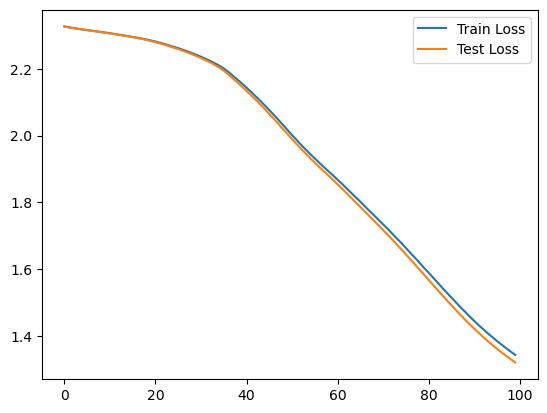

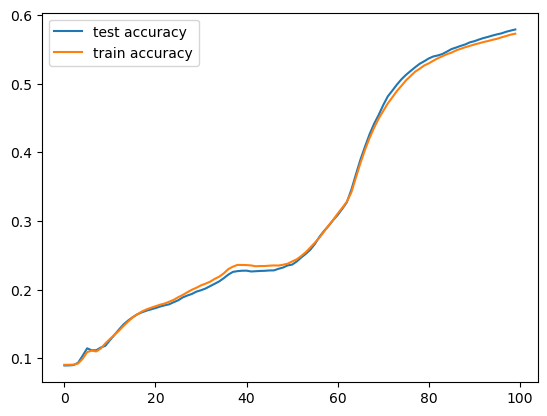

In [9]:
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label ='Test Loss')
plt.legend()
plt.show()
plt.clf()
plt.plot(test_accuracy, label='test accuracy')
plt.plot(train_accuracy, label ='train accuracy')
plt.legend()
plt.show()
